# <center> APPRENTISSAGE SUPERVISE </center>
## LARTIGUE Auriane & MOUKHLIS Nabil
### 5 SDBD A2

---
### <center> KNN - K plus proches voisins </center>
---

In [1]:
from sklearn import cluster
from sklearn import metrics
from sklearn.datasets import fetch_openml 
from sklearn import datasets 
import matplotlib.pyplot as plt 

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Manipulation de la base de données

# print(mnist)
# print (mnist.data)
# print (mnist.target)
# len(mnist.data) 
# help(len)
# print (mnist.data.shape) 
# print (mnist.target.shape) 
# print(mnist.data.values[0]) 
# print(mnist.target[0]) 
# mnist.data.values[0][1]
# print(len(mnist.data.values[:,1])) 
# mnist.data

In [3]:
# Charger le jeu de données mnist
mnist = fetch_openml('mnist_784') # Utiliser mnist_784
mnist = datasets.fetch_openml('mnist_784')
# mnist = datasets.fetch_openml('mnist_784',as_frame=False)

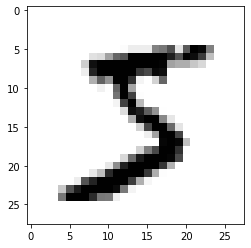

5


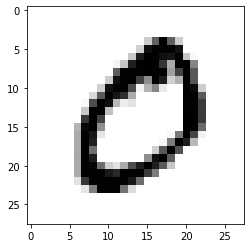

0


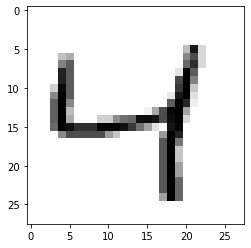

4


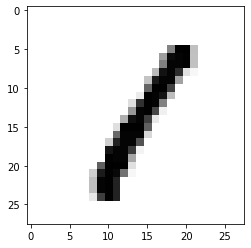

1


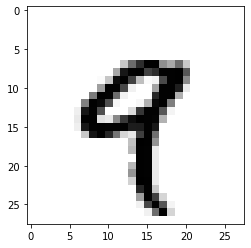

9


In [4]:
images = mnist.data.values.reshape((-1, 28, 28))
for i in range(5):
    plt.imshow(images[i],cmap=plt.cm.gray_r,interpolation="nearest") 
    plt.show()
    print(mnist.target[i]) # 

In [5]:
from sklearn import neighbors
from sklearn import model_selection
import numpy as np
import time

# Prendre un échantillon de données appelé data avec une taille de 5000 exemples 
echantillon = np.random.randint(len(mnist.data),size=5000)
data = mnist.data.values[echantillon]
target = mnist.target[echantillon]

# Diviser la base de données à 80% pour l’apprentissage (training) et à 20% pour les tests
xtrain,  xtest,  ytrain,  ytest  =  model_selection.train_test_split(data,  target, train_size=0.8)

# Entrainer un classifieur k-nn avec k = 10 sur le jeu de données chargé
n_neighbors=10
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(xtrain,ytrain)

# Afficher la classe de l’image 4 et sa classe prédite
print(clf.predict([data[4]]))
print("Target: ",target.values[4])

# Afficher le score sur l’échantillon de test
print("Score Test: ",clf.score(xtest, ytest))
print("Score Train: ",clf.score(xtrain, ytrain))

# Faire varier le nombre de voisins (k) de 2 jusqu’à 15 et afficher le score
scores_k_train=[]
scores_k_test=[]
times_k_train=[]
nb_splits=10
for k in range(2,16):
    kf = model_selection.KFold(n_splits=nb_splits, shuffle=True)
    score_train=0
    score_test=0
    time_train=0
    for train_index, test_index in kf.split(data): #On boucle sur les différents folds
        X_train, X_test = data[train_index], data[test_index]
        Y_train, Y_test = target.values[train_index], target.values[test_index]
        clf = neighbors.KNeighborsClassifier(k)
        train_start=time.time() # On mesure la durée du training
        clf.fit(X_train,Y_train)
        train_end = time.time() 
        time_train = time_train + (train_end - train_start)
        score_test = score_test + clf.score(X_test,Y_test)
        score_train = score_train + clf.score(X_train,Y_train)
    scores_k_train.append(score_train/nb_splits)
    scores_k_test.append(score_test/nb_splits)
    times_k_train.append(time_train/nb_splits)

# Graphique des scores selon le nombre de voisins choisi
plt.figure(figsize=(12,12))
plt.subplot(221,title="Score Train")
plt.plot(range(2,16),scores_k_train,c="blue")
plt.scatter(range(2,16),scores_k_train,c="red")
plt.subplot(222,title="Score Test")
plt.plot(range(2,16),scores_k_test,c="blue")
plt.scatter(range(2,16),scores_k_test,c="red")
plt.subplot(223,title="Time of Train")
plt.plot(range(2,16),times_k_train,c="blue")
plt.scatter(range(2,16),times_k_train,c="red")
plt.show()        
    

['2']
Target:  2
Score Test:  0.919
Score Train:  0.93075


KeyboardInterrupt: 

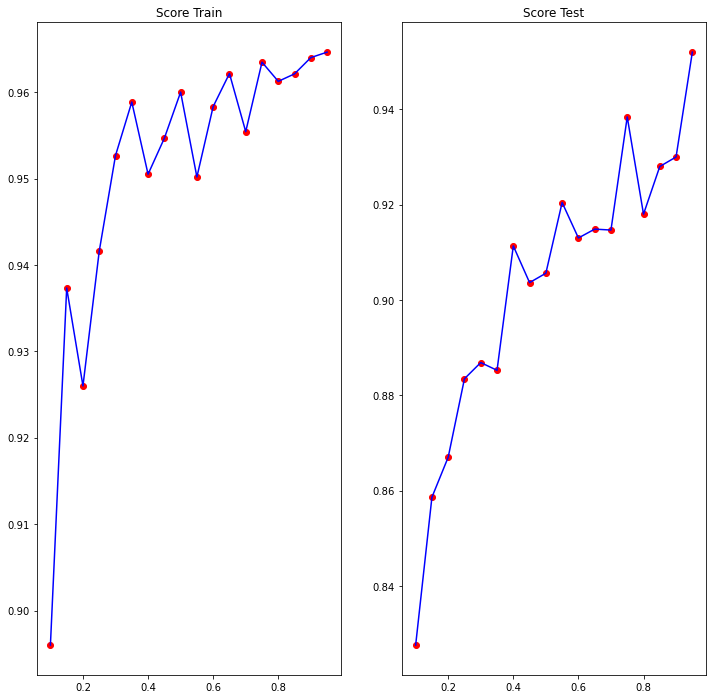

In [12]:
# Faites varier le pourcentage des échantillons (training et test) et affichez le score
scores_nb_splits_train=[]
scores_nb_splits_test=[]
nb_neigbors=3
ratios=[x/100.0 for x in range(10,100,5)]
for train_ratio in ratios:
    xtrain,  xtest,  ytrain,  ytest  =  model_selection.train_test_split(data,  target, train_size=train_ratio)
    clf = neighbors.KNeighborsClassifier(nb_neigbors)
    clf.fit(xtrain,ytrain)
    scores_nb_splits_test.append(clf.score(xtest, ytest))
    scores_nb_splits_train.append(clf.score(xtrain, ytrain))

# Graphique des scores selon le pourcentage des échantillons choisi
plt.figure(figsize=(12,12))
plt.subplot(121,title="Score Train")
plt.plot(ratios,scores_nb_splits_train,c="blue")
plt.scatter(ratios,scores_nb_splits_train,c="red")
plt.subplot(122,title="Score Test")
plt.plot(ratios,scores_nb_splits_test,c="blue")
plt.scatter(ratios,scores_nb_splits_test,c="red")
plt.show()

In [18]:
ratios=[x/100.0 for x in range(10,100,5)]
print(ratios)

[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]


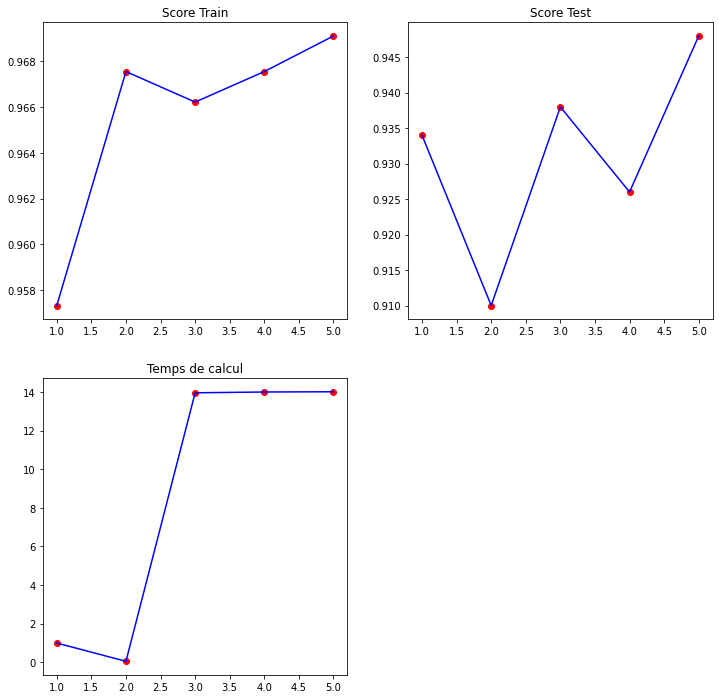

In [61]:
# Faites varier les types de distances (p)
scores_p_train=[]
scores_p_test=[]
times_p=[]
nb_neigbors=3
pmax=6
for dist in range(1,pmax):
    xtrain,  xtest,  ytrain,  ytest  =  model_selection.train_test_split(data,  target, train_size=0.90)
    clf = neighbors.KNeighborsClassifier(nb_neigbors,p=dist)
    start=time.time()
    clf.fit(xtrain,ytrain)
    clf.predict(xtest)
    end=time.time()
    scores_p_test.append(clf.score(xtest, ytest))
    scores_p_train.append(clf.score(xtrain, ytrain))
    times_p.append(end-start)

# Graphique des scores selon le type de distances (p) choisi
plt.figure(figsize=(12,12))
plt.subplot(221,title="Score Train")
plt.scatter(range(1,pmax),scores_p_train,c="red")
plt.plot(range(1,pmax),scores_p_train,c="blue")
plt.subplot(222,title="Score Test")
plt.scatter(range(1,pmax),scores_p_test,c="red")
plt.plot(range(1,pmax),scores_p_test,c="blue")
plt.subplot(223,title="Temps de calcul")
plt.scatter(range(1,pmax),times_p,c="red")
plt.plot(range(1,pmax),times_p,c="blue")
plt.show()

In [60]:
# Fixez n_job à  1 puis à -1 et calculez le temps de chacun. 
import time

time_jobs_test=[]
time_jobs_train=[]
xtrain,  xtest,  ytrain,  ytest  =  model_selection.train_test_split(data,  target, train_size=0.90)
nb_splits=10
for jobs in [-1,1]:    
    kf = model_selection.KFold(n_splits=nb_splits, shuffle=True)
    score_train=0
    score_test=0
    time_train=0
    for train_index, test_index in kf.split(data): #On boucle sur les différents folds
        X_train, X_test = data[train_index], data[test_index]
        Y_train, Y_test = target.values[train_index], target.values[test_index]
        
        clf = neighbors.KNeighborsClassifier(3,n_jobs=jobs)
        train_start=time.time() # On mesure la durée du training
        clf.fit(X_train,Y_train)
        clf.predict(X_test)
        train_end = time.time()
        
        time_train = time_train + (train_end - train_start)
    time_jobs_train.append(time_train)
    print(jobs,time_train)
# Affichage des temps de calculs
print ('job = -1: train ' , time_jobs_train[0]  )
print ('job = 1 : train ' , time_jobs_train[1]  )

-1 2.1190009117126465
1 0.5000615119934082
job = -1: train  2.1190009117126465
job = 1 : train  0.5000615119934082


---
### <center> ANN - Réseaux de neuronnes artificiels </center>
---

In [17]:
from sklearn import neighbors
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
# On conserve la même taille d'échantillon qu'au TP précedent afin de pouvoir comparer les différentes méthodes
echantillon = np.random.randint(len(mnist.data),size=5000)
data = mnist.data.values[echantillon]
target = mnist.target[echantillon]
# Diviser la base de données à 70% pour l’apprentissage (training) et à 30% pour les tests
percentage = 49000/len(mnist.data) # = 70%
xtrain,  xtest,  ytrain,  ytest  =  model_selection.train_test_split(data,target, train_size=percentage)
# Construire un modèle de classification ayant comme paramètre hidden_layer_sizes = (50)
clf = MLPClassifier(hidden_layer_sizes=(50)).fit(xtrain,ytrain)
# Calcul de la précession du classifieur 
print("Précision du train set:",clf.score(xtrain,ytrain))
print("Précision du test set:",clf.score(xtest,ytest))

Précision du train set: 0.9991428571428571
Précision du test set: 0.8433333333333334


In [18]:
# Afficher la classe de l’image 4 et sa classe prédite
print(clf.predict([data[4]]))
print("Target: ",target.values[4])

['4']
Target:  4


In [20]:
# Calculez la précision en utilisant le package precision_score
from sklearn.metrics import precision_score
print(precision_score(clf.predict(data),target.values,average='micro'))

0.9524


In [28]:
# Varier le nombre de couches entre 1 et 20 de taille de 50 neurones
precisions = []
for i in range(1,21):
    layers=tuple([10 for k in range(i)])
    clf = MLPClassifier(hidden_layer_sizes=layers).fit(xtrain,ytrain)
    # Recalculer la précision du classifieur
    precisions.append(precision_score(clf.predict(mnist.data.values),mnist.target.values,average='micro'))

/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


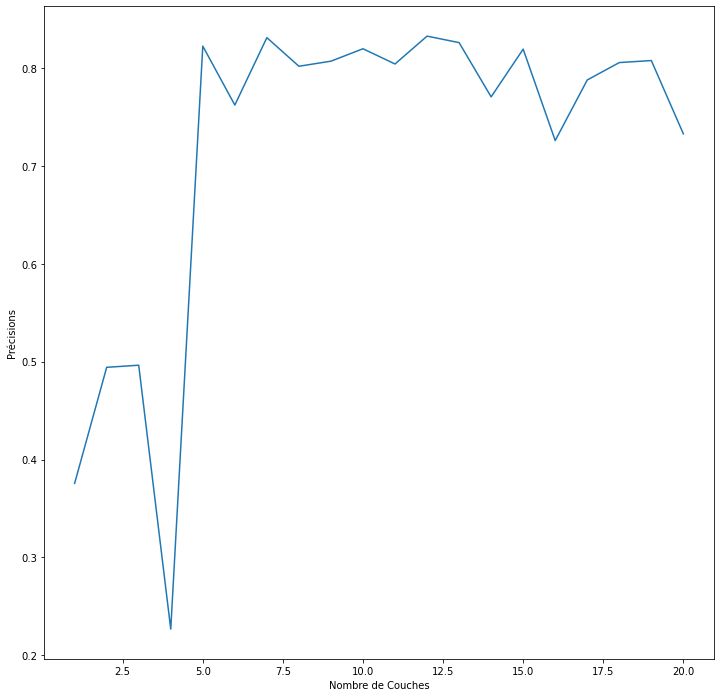

In [30]:
plt.figure(figsize=(12,12))
plt.plot(range(1,21),precisions)
plt.xlabel("Nombre de Couches")
plt.ylabel("Précisions")
plt.show()

In [31]:
import random
import time
# Construire cinq modèles de classification des données mnist, avec des 
# réseaux qui ont respectivement de 1 à 10 couches cachées, et des tailles de 
# couches entre 10 et 300 neurones au choix d’une façon aléatoire.
classifiers = []
for i in range(5):
    nb_layers=random.randint(2,11)
    layers=[random.randint(10,300) for k in range(1,nb_layers) ]
    start = time.time()
    clf = MLPClassifier(hidden_layer_sizes=layers).fit(xtrain,ytrain)
    end = time.time()
    score = precision_score(clf.predict(mnist.data.values),mnist.target.values,average='micro')
    classifiers.append((layers,score,end-start))
    print(" Couches | Moyennes neuronnes | Nb de Couche | Précision | Temps de Calcul")
    print((layers,np.mean(layers), len(layers), score ,end-start))

 Couches | Moyennes neuronnes | Nb de Couche | Précision | Temps de Calcul
([300, 109, 223, 101, 155, 253, 12, 160], 164.125, 8, 0.37544285714285713, 9.394229412078857)
 Couches | Moyennes neuronnes | Nb de Couche | Précision | Temps de Calcul
([99, 16, 45, 135, 158, 134, 70, 224, 43, 22], 94.6, 10, 0.906, 3.6100995540618896)
 Couches | Moyennes neuronnes | Nb de Couche | Précision | Temps de Calcul
([209, 269, 187], 221.66666666666666, 3, 0.8789, 2.2173001766204834)
 Couches | Moyennes neuronnes | Nb de Couche | Précision | Temps de Calcul
([218], 218.0, 1, 0.9043428571428571, 1.9704575538635254)
 Couches | Moyennes neuronnes | Nb de Couche | Précision | Temps de Calcul
([118, 273, 114, 218, 10], 146.6, 5, 0.5287, 10.079743146896362)


In [32]:
# Fonction permettant de tracer les différentes courbes d'erreurs, Temps d’apprentissage, Précision et rappel
def plot(intervalle,scores,times,recalls,errors):
    plt.figure(figsize=(16,4))
    plt.subplot(141, title = "Score")
    plt.plot(intervalle,scores,'green')
    plt.subplot(142, title = "Time")
    plt.plot(intervalle,times,'green')
    plt.subplot(143, title = "Recall")
    plt.plot(intervalle,recalls,'green')
    plt.subplot(144, title = "Error")
    plt.plot(intervalle,errors,'green')
    plt.show()

Solver  lbfgs
Score  0.9772
Recall  0.9772
Time  4.137812614440918
Error  0.022800000000000042
Solver  sgd
Iteration 1, loss = 3.21927673
Iteration 2, loss = 1.21647353
Iteration 3, loss = 0.70644840
Iteration 4, loss = 0.48247924
Iteration 5, loss = 0.35646885
Iteration 6, loss = 0.27433972
Iteration 7, loss = 0.21331878
Iteration 8, loss = 0.16640666
Iteration 9, loss = 0.13234582
Iteration 10, loss = 0.10363369
Iteration 11, loss = 0.08307017
Iteration 12, loss = 0.06743223
Iteration 13, loss = 0.05317945
Iteration 14, loss = 0.04454940
Iteration 15, loss = 0.03745447
Iteration 16, loss = 0.03220187
Iteration 17, loss = 0.02724088
Iteration 18, loss = 0.02261651
Iteration 19, loss = 0.02118938
Iteration 20, loss = 0.01694822
Iteration 21, loss = 0.01427987
Iteration 22, loss = 0.01253391
Iteration 23, loss = 0.01111873
Iteration 24, loss = 0.01020180
Iteration 25, loss = 0.00914730
Iteration 26, loss = 0.00842193
Iteration 27, loss = 0.00777120
Iteration 28, loss = 0.00721166
Iterat

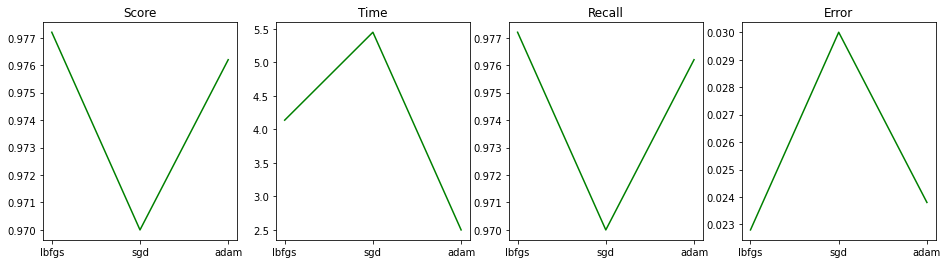

In [36]:
from sklearn.metrics import recall_score
# Étudier la convergence des algorithmes d’optimisation disponibles : L-BFGS, SGD et Adam.
solvers=['lbfgs','sgd','adam']
scores = []
times = []
recalls = []
errors = []
layers = [130,130,130,130,130,130,130,130] 
for s in solvers:
    print("Solver ",s)
    begin = time.time()
    clf = MLPClassifier(hidden_layer_sizes=layers,solver=s,verbose=True,max_iter=400).fit(xtrain,ytrain)
    end = time.time()
    score = precision_score(clf.predict(data),target.values,average='micro')
    scores.append(score)
    t = end-begin
    times.append(t)
    recall = recall_score(target,clf.predict(data),average='micro')
    recalls.append(recall)
    error = metrics.zero_one_loss(target,clf.predict(data))
    errors.append(error)
    print('Score ' , score )
    print('Recall ' , recall)
    print('Time ' , t)
    print('Error ' , error)
plot(solvers, scores, times, recalls, errors)

/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Score  0.958
Recall  0.958
Time  15.585713386535645
Error  0.04200000000000004
Score  0.1086
Recall  0.1086
Time  0.5842750072479248
Error  0.8914
Score  0.9728
Recall  0.9728
Time  38.45860195159912
Error  0.027200000000000002
Score  0.9766
Recall  0.9766
Time  4.4544196128845215
Error  0.023399999999999976


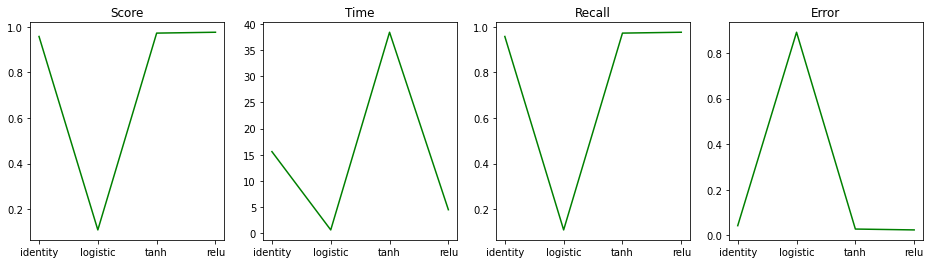

In [37]:
from sklearn.metrics import zero_one_loss
# Varier les fonctions d’activation {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
acti_functions=['identity','logistic','tanh','relu']
scores = []
times = []
recalls = []
errors = []
for af in acti_functions:
    begin = time.time()
    clf = MLPClassifier(hidden_layer_sizes=layers,solver='lbfgs',max_iter = 400, activation=af,verbose=True).fit(xtrain,ytrain)
    end = time.time()
    score = precision_score(clf.predict(data),target.values,average='micro')
    scores.append(score)
    t = end-begin
    times.append(t)
    recall = recall_score(target,clf.predict(data),average='micro')
    recalls.append(recall)
    error = metrics.zero_one_loss(target,clf.predict(data))
    errors.append(error)
    print('Score ' , score )
    print('Recall ' , recall)
    print('Time ' , t)
    print('Error ' , error)
    
plot(acti_functions, scores, times, recalls, errors)


Alpha  0.001
Score  0.9742
Recall  0.9742
Time  3.8004984855651855
Error  0.025800000000000045
Alpha  0.101
Score  0.9774
Recall  0.9774
Time  3.800940752029419
Error  0.022599999999999953
Alpha  0.201
Score  0.9772
Recall  0.9772
Time  3.949435234069824
Error  0.022800000000000042


/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Alpha  0.301
Score  0.9712
Recall  0.9712
Time  32.39383840560913
Error  0.028800000000000048


/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Alpha  0.401
Score  0.9722
Recall  0.9722
Time  33.61744499206543
Error  0.027800000000000047


/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Alpha  0.501
Score  0.9716
Recall  0.9716
Time  35.16024208068848
Error  0.02839999999999998


/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Alpha  0.601
Score  0.973
Recall  0.973
Time  33.88042712211609
Error  0.027000000000000024


/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Alpha  0.701
Score  0.9706
Recall  0.9706
Time  33.370025396347046
Error  0.02939999999999998


/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Alpha  0.801
Score  0.9704
Recall  0.9704
Time  32.63361430168152
Error  0.02959999999999996


/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Alpha  0.901
Score  0.971
Recall  0.971
Time  34.07013392448425
Error  0.029000000000000026


/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Alpha  1.001
Score  0.9754
Recall  0.9754
Time  31.434778690338135
Error  0.024599999999999955


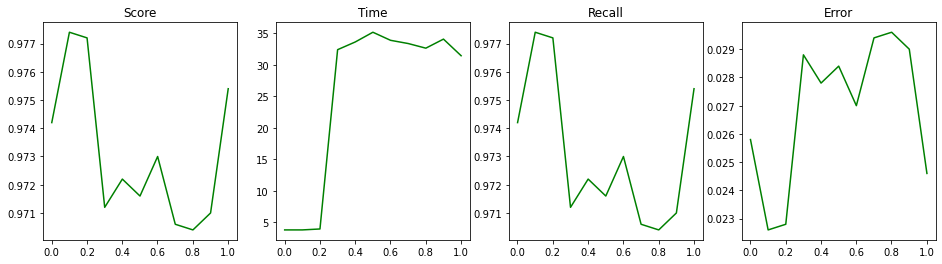

In [38]:
# Varier la valeur de la régularisation L2 (paramètre α).
alphas=[x/1000 for x in range(1,1100,100)]
scores = []
times = []
recalls = []
errors = []
for a in alphas:
    begin = time.time()
    clf = MLPClassifier(hidden_layer_sizes=layers,solver='lbfgs',activation='relu',alpha=a, max_iter = 400 ).fit(xtrain,ytrain)
    end = time.time()
    score = precision_score(clf.predict(data),target.values,average='micro')
    scores.append(score)
    t = end-begin
    times.append(t)
    recall = recall_score(target,clf.predict(data),average='micro')
    recalls.append(recall)
    error = metrics.zero_one_loss(target,clf.predict(data))
    errors.append(error)
    print('Alpha ' , a )
    print('Score ' , score )
    print('Recall ' , recall)
    print('Time ' , t)
    print('Error ' , error)
    
plot(alphas, scores, times, recalls, errors)



In [41]:
# Choisissez le modèle qui propose de meilleurs résultats.
clf = MLPClassifier(hidden_layer_sizes=layers,solver='lbfgs',activation='relu',alpha=0.1, max_iter = 400 ).fit(xtrain,ytrain)
print("Score du modèle optimal : ", precision_score(clf.predict(data),target.values,average='micro'))
print("Précision du train set:",clf.score(xtrain,ytrain))
print("Précision du test set:",clf.score(xtest,ytest))

Score du modèle optimal :  0.9764
Précision du train set: 1.0
Précision du test set: 0.9213333333333333


---
### <center> SVM - Machine à Vecteurs Supports </center>
---

In [2]:
from sklearn import svm
from sklearn.datasets import fetch_openml
from sklearn import model_selection
import numpy as np
#Importer MNIST (A decommenter si nécessaire)
mnist = fetch_openml('mnist_784')
#Créer un échantillon pour travailler sur la même taille que précédemment
echantillon = np.random.randint(len(mnist.data),size=5000)
data = mnist.data.values[echantillon]
target = mnist.target[echantillon]

#Diviser la base de données à 70% pour l’apprentissage (training) et à 30% pour les tests
xtrain,  xtest,  ytrain,  ytest  =  model_selection.train_test_split(data,  target, train_size=0.7)

#Créer un modèle de classification avec un noyau de type linéaire
clsvm = svm.SVC(kernel='linear')

#Entraîner le modèle sur la base entraînement
clsvm.fit(xtrain,ytrain)



SVC(kernel='linear')

Kernel: linear pour un échantillon de taille 500
Temps d'apprentissage:  0.030369281768798828
Precision score:  0.95
Erreur : 0.050000000000000044
Recall:  0.950761443745187
Kernel: linear pour un échantillon de taille 1000
Temps d'apprentissage:  0.07226300239562988
Precision score:  0.972
Erreur : 0.028000000000000025
Recall:  0.9704345958455791
Kernel: linear pour un échantillon de taille 5000
Temps d'apprentissage:  0.6841609477996826
Precision score:  0.9728
Erreur : 0.027200000000000002
Recall:  0.9720976999465865
Kernel: linear pour un échantillon de taille 10000
Temps d'apprentissage:  2.7881720066070557
Precision score:  0.975
Erreur : 0.025000000000000022
Recall:  0.9744111753834794
Kernel: linear pour un échantillon de taille 15000
Temps d'apprentissage:  6.054425239562988
Precision score:  0.9743333333333334
Erreur : 0.025666666666666615
Recall:  0.9740501262734174
Kernel: linear pour un échantillon de taille 20000
Temps d'apprentissage:  11.027865171432495
Precision score:

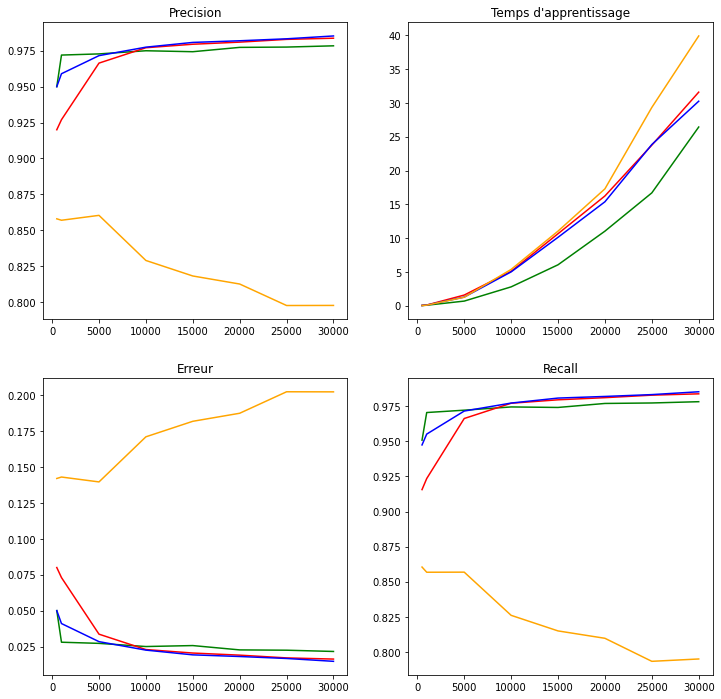

In [6]:
from sklearn.metrics import precision_score
from sklearn.metrics import zero_one_loss
import matplotlib.pyplot as plt 
import time
from sklearn.metrics import recall_score
# Les différenters tailles d'échantillons
intervalle = [500,1000,5000,10000,15000,20000,25000,30000]
#Résultats des métriques pour les 4 fonctions de noyau
all_time=[]
all_recall=[]
all_precision=[]
all_erreur=[]
for kernel in ["linear","poly","rbf","sigmoid"]:
    appr_time=[]
    recalls=[]
    precisions=[]
    erreurs=[]
    for length in intervalle:
        echantillon = np.random.randint(len(mnist.data),size=length)
        data = mnist.data.values[echantillon]
        target = mnist.target[echantillon]
        xtrain,  xtest,  ytrain,  ytest  =  model_selection.train_test_split(data,  target, train_size=0.7)
        clsvm = svm.SVC(kernel=kernel)
        start=time.time()
        clsvm.fit(xtrain,ytrain)
        end=time.time()
        appr_time.append(end-start)
        predicted=clsvm.predict(data)
        print("Kernel: "+kernel+" pour un échantillon de taille "+str(length))
        print("Temps d'apprentissage: ",end-start)
        precision=precision_score(target,predicted,average='micro')
        print("Precision score: ",precision)
        precisions.append(precision)
        erreur=zero_one_loss(target,predicted)
        erreurs.append(erreur)
        print("Erreur :",erreur)
        recall = recall_score(target,predicted,average='macro')
        recalls.append(recall)
        print("Recall: ", recall)
    all_erreur.append(erreurs)
    all_time.append(appr_time)
    all_precision.append(precisions)
    all_recall.append(recalls)

plt.figure(figsize=(12,12))
plt.subplot(221,title="Precision")
plt.plot(intervalle,all_precision[0],"green")
plt.plot(intervalle,all_precision[1],"red")
plt.plot(intervalle,all_precision[2],"blue")
plt.plot(intervalle,all_precision[3],"orange")
plt.subplot(222,title="Temps d'apprentissage")
plt.plot(intervalle,all_time[0],"green")
plt.plot(intervalle,all_time[1],"red")
plt.plot(intervalle,all_time[2],"blue")
plt.plot(intervalle,all_time[3],"orange")
plt.subplot(223,title="Erreur")
plt.plot(intervalle,all_erreur[0],"green")
plt.plot(intervalle,all_erreur[1],"red")
plt.plot(intervalle,all_erreur[2],"blue")
plt.plot(intervalle,all_erreur[3],"orange")
plt.subplot(224,title="Recall")
plt.plot(intervalle,all_recall[0],"green")
plt.plot(intervalle,all_recall[1],"red")
plt.plot(intervalle,all_recall[2],"blue")
plt.plot(intervalle,all_recall[3],"orange")
plt.show()
    
    

In [11]:
# Précision sur les jeux d'entraînement et de test pour le noyau linear
from sklearn.metrics import precision_score
echantillon = np.random.randint(len(mnist.data),size=5000)
data = mnist.data.values[echantillon]
target = mnist.target[echantillon]
xtrain,  xtest,  ytrain,  ytest  =  model_selection.train_test_split(data,  target, train_size=0.7)
clsvm = svm.SVC(kernel='linear')
start=time.time()
clsvm.fit(xtrain,ytrain)
print(precision_score(clsvm.predict(data),target,average='micro'))
print("Précision du train set:",clsvm.score(xtrain,ytrain))
print("Précision du test set:",clsvm.score(xtest,ytest))

0.9748
Précision du train set: 1.0
Précision du test set: 0.916


In [12]:
# Précision sur les jeux d'entraînement et de test pour le noyau poly
clsvm = svm.SVC(kernel='poly')
clsvm.fit(xtrain,ytrain)
print(precision_score(clsvm.predict(data),target,average='micro'))
print("Précision du train set:",clsvm.score(xtrain,ytrain))
print("Précision du test set:",clsvm.score(xtest,ytest))

0.9662
Précision du train set: 0.9817142857142858
Précision du test set: 0.93


In [13]:
# Précision sur les jeux d'entraînement et de test pour le noyau rbf
clsvm = svm.SVC(kernel='rbf')
clsvm.fit(xtrain,ytrain)
print(precision_score(clsvm.predict(data),target,average='micro'))
print("Précision du train set:",clsvm.score(xtrain,ytrain))
print("Précision du test set:",clsvm.score(xtest,ytest))

0.974
Précision du train set: 0.9848571428571429
Précision du test set: 0.9486666666666667


In [14]:
# Précision sur les jeux d'entraînement et de test pour le noyau sigmoid
clsvm = svm.SVC(kernel='sigmoid')
clsvm.fit(xtrain,ytrain)
print(precision_score(clsvm.predict(data),target,average='micro'))
print("Précision du train set:",clsvm.score(xtrain,ytrain))
print("Précision du test set:",clsvm.score(xtest,ytest))

0.8568
Précision du train set: 0.8554285714285714
Précision du test set: 0.86


Temps d'apprentissage:  64.62438416481018
Precision score:  0.9488666666666666
Erreur : 0.051133333333333364
Recall:  0.9485101520960176
Temps d'apprentissage:  41.78838515281677
Precision score:  0.9691333333333333
Erreur : 0.03086666666666671
Recall:  0.9689471185180931
Temps d'apprentissage:  35.56184411048889
Precision score:  0.9774333333333334
Erreur : 0.022566666666666624
Recall:  0.977322273515904
Temps d'apprentissage:  33.32282090187073
Precision score:  0.9816333333333334
Erreur : 0.018366666666666642
Recall:  0.9815273300492413
Temps d'apprentissage:  30.782761812210083
Precision score:  0.985
Erreur : 0.015000000000000013
Recall:  0.9848992829607394


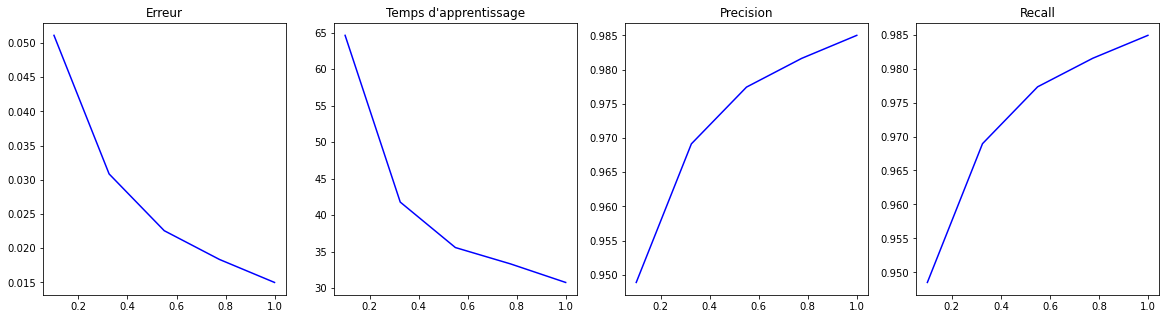

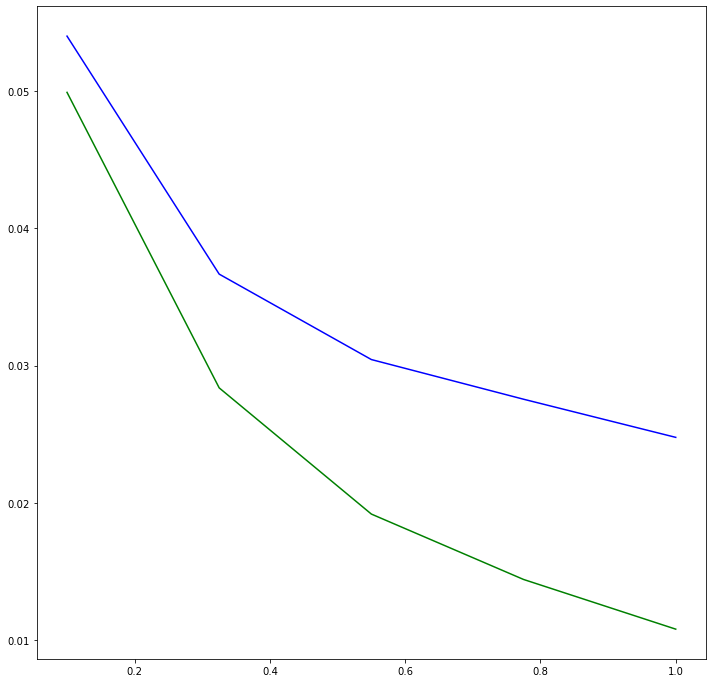

In [8]:
import matplotlib.pyplot as plt 
import time
from sklearn.metrics import recall_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import precision_score
#Récupération des résultats des différentes métriques pour tracer les graphes
train_scores=[]
test_scores=[]
appr_time=[]
recalls=[]
precisions=[]
erreurs=[]
train_erreur=[]
test_erreur=[]

# On prend une taille d'échantillon de 30000 (à changer pour tests rapides)
echantillon = np.random.randint(len(mnist.data),size=30000)
data = mnist.data.values[echantillon]
target = mnist.target[echantillon]
xtrain,  xtest,  ytrain,  ytest  =  model_selection.train_test_split(data,  target, train_size=0.7)
# On fait varier C de 0.1 à 1
intervalle=np.linspace(0.1, 1, num=5)
for c in intervalle:
    clsvm = svm.SVC(kernel='rbf',C=c)
    start=time.time()
    clsvm.fit(xtrain,ytrain)
    end=time.time()
    appr_time.append(end-start)
    predicted=clsvm.predict(data)
    print("Temps d'apprentissage: ",end-start)
    precision=precision_score(target,predicted,average='micro')
    print("Precision score: ",precision)
    precisions.append(precision)
    erreur=zero_one_loss(target,predicted)
    erreurs.append(erreur)
    print("Erreur :",erreur)
    recall = recall_score(target,predicted,average='macro')
    recalls.append(recall)
    print("Recall: ", recall)
    train_erreur.append(zero_one_loss(ytrain,clsvm.predict(xtrain)))
    test_erreur.append(zero_one_loss(ytest,clsvm.predict(xtest)))
        

# On trace les graphes des différentes métriques selon C
plt.figure(figsize=(20,5))
plt.subplot(141,title="Erreur")
plt.plot(intervalle,erreurs,"blue")
plt.subplot(142,title="Temps d'apprentissage")
plt.plot(intervalle,appr_time,"blue")
plt.subplot(143,title="Precision")
plt.plot(intervalle,precisions,"blue")
plt.subplot(144,title="Recall")
plt.plot(intervalle,recalls,"blue")
plt.show()

# On trace les graphiques de l'erreur en fonction de C pour les jeux d'entrainement et de test
plt.figure(figsize=(12,12))
plt.plot(intervalle,train_erreur,"green")
plt.plot(intervalle,test_erreur,"blue")
plt.show()

[[4929    1    9    2    3    4    8    4   16    2]
 [   0 5546   18   10   11    0    0    5    3    1]
 [  25   12 4824   14   35    4   15   17   35    1]
 [   6    8   43 4913    2   45    7   29   48   18]
 [   7    9   10    0 4816    1   16    8    9   46]
 [  10   15    4   56   13 4389   30    0   11    7]
 [  18    1    2    0   10   39 4799    0    8    0]
 [   3   26   37    4   27    3    2 4987    2   39]
 [   5   21   14   34   11   43   10    6 4697   13]
 [  12    4    8   31   61   17    0   60   14 4802]]


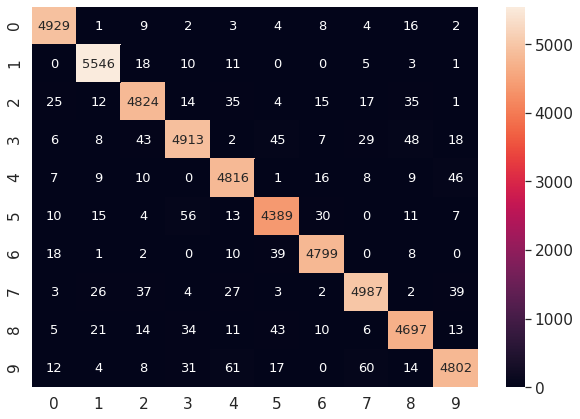

In [12]:
#Création de la matrice de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
echantillon = np.random.randint(len(mnist.data),size=30000)
data = mnist.data.values[echantillon]
target = mnist.target[echantillon]
xtrain,  xtest,  ytrain,  ytest  =  model_selection.train_test_split(data,  target, train_size=0.7)
clsvm = svm.SVC(kernel='rbf')
start=time.time()
clsvm.fit(xtrain,ytrain)
cm = confusion_matrix(target, clsvm.predict(data)) 
df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 13},fmt="d")# font size
print(cm)

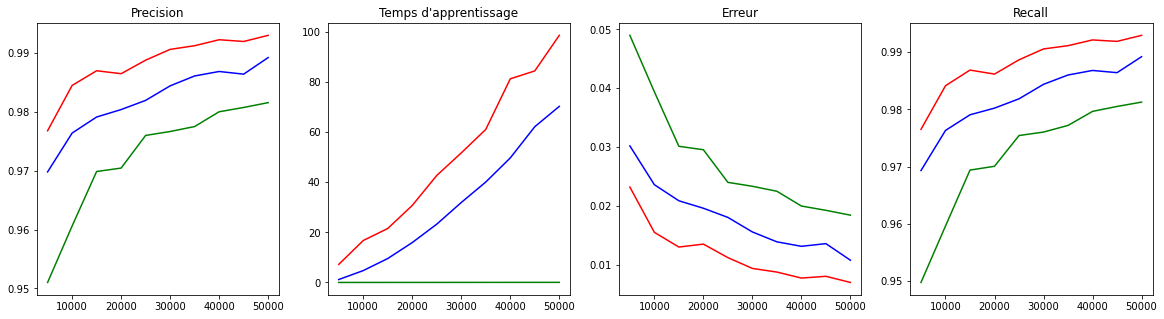

In [11]:
# Comparaison des trois méthodes vues dans les différents TP

from sklearn.metrics import precision_score
from sklearn.metrics import zero_one_loss
import matplotlib.pyplot as plt 
import time
from sklearn.metrics import recall_score
from sklearn import neighbors
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
intervalle = [5000,10000,15000,20000,25000,30000,35000,40000,45000,50000]
all_time=[]
all_recall=[]
all_precision=[]
all_erreur=[]
layers = [130,130,130,130,130,130,130,130] 
for method in ["knn","ann","svm"]:
    appr_time=[]
    recalls=[]
    precisions=[]
    erreurs=[]
    for length in intervalle:
        echantillon = np.random.randint(len(mnist.data),size=length)
        data = mnist.data.values[echantillon]
        target = mnist.target[echantillon]
        xtrain,  xtest,  ytrain,  ytest  =  model_selection.train_test_split(data,  target, train_size=0.7)
        start=time.time()
        if method == "svm":
            clf = svm.SVC(kernel="poly",C=1)
        elif method == "ann":
            clf = MLPClassifier(hidden_layer_sizes=layers,solver='lbfgs',activation='relu',alpha=0.1, max_iter = 400 )
        elif method == "knn":
            clf = neighbors.KNeighborsClassifier(3,n_jobs=1)
        clf.fit(xtrain,ytrain)
        end=time.time()
        appr_time.append(end-start)
        predicted=clf.predict(data)
        print("Modele: "+method+" pour un échantillon de taille "+str(length))
        print("Temps d'apprentissage: ",end-start)
        precision=precision_score(target,predicted,average='micro')
        print("Precision score: ",precision)
        precisions.append(precision)
        erreur=zero_one_loss(target,predicted)
        erreurs.append(erreur)
        print("Erreur :",erreur)
        recall = recall_score(target,predicted,average='macro')
        recalls.append(recall)
        print("Recall: ", recall)
    all_erreur.append(erreurs)
    all_time.append(appr_time)
    all_precision.append(precisions)
    all_recall.append(recalls)

plt.figure(figsize=(20,5))
plt.subplot(141,title="Precision")
plt.plot(intervalle,all_precision[0],"green")
plt.plot(intervalle,all_precision[1],"red")
plt.plot(intervalle,all_precision[2],"blue")
plt.subplot(142,title="Temps d'apprentissage")
plt.plot(intervalle,all_time[0],"green")
plt.plot(intervalle,all_time[1],"red")
plt.plot(intervalle,all_time[2],"blue")
plt.subplot(143,title="Erreur")
plt.plot(intervalle,all_erreur[0],"green")
plt.plot(intervalle,all_erreur[1],"red")
plt.plot(intervalle,all_erreur[2],"blue")
plt.subplot(144,title="Recall")
plt.plot(intervalle,all_recall[0],"green")
plt.plot(intervalle,all_recall[1],"red")
plt.plot(intervalle,all_recall[2],"blue")
plt.show()